## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing data

In [2]:
data = pd.read_excel('ALF_Data.xlsx')
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
Age                       8785 non-null int64
Gender                    8785 non-null object
Region                    8785 non-null object
Weight                    8591 non-null float64
Height                    8594 non-null float64
Body Mass Index           8495 non-null float64
Obesity                   8495 non-null float64
Waist                     8471 non-null float64
Maximum Blood Pressure    8481 non-null float64
Minimum Blood Pressure    8409 non-null float64
Good Cholesterol          8768 non-null float64
Bad Cholesterol           8767 non-null float64
Total Cholesterol         8769 non-null float64
Dyslipidemia              8785 non-null int64
PVD                       8785 non-null int64
Physical Activity         8775 non-null float64
Education                 8765 non-null float64
Unmarried                 8333 non-null float64
Income                    7624 non-nu

## Data cleaning

In [4]:
#Finding null values

data.isnull().sum()

Age                          0
Gender                       0
Region                       0
Weight                     194
Height                     191
Body Mass Index            290
Obesity                    290
Waist                      314
Maximum Blood Pressure     304
Minimum Blood Pressure     376
Good Cholesterol            17
Bad Cholesterol             18
Total Cholesterol           16
Dyslipidemia                 0
PVD                          0
Physical Activity           10
Education                   20
Unmarried                  452
Income                    1161
Source of Care               0
PoorVision                 563
Alcohol Consumption          0
HyperTension                80
Family  HyperTension         0
Diabetes                     2
Family Diabetes              0
Hepatitis                   22
Family Hepatitis             6
Chronic Fatigue             35
ALF                       2785
dtype: int64

In [5]:
#Since ALF is the key variable in the dataset we drop rows with null values for ALF

data = data.loc[data['ALF'].notnull()]
data.isnull().sum()

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [6]:
# Columns with continuous variables: replace null values with column mean

cont_var = ['Weight', 'Height', 'Body Mass Index', 'Waist', 'Maximum Blood Pressure', 
            'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol']

for col in cont_var:
    data[col] = data[col].fillna(data[col].mean())
    
data.isnull().sum()

Age                         0
Gender                      0
Region                      0
Weight                      0
Height                      0
Body Mass Index             0
Obesity                   206
Waist                       0
Maximum Blood Pressure      0
Minimum Blood Pressure      0
Good Cholesterol            0
Bad Cholesterol             0
Total Cholesterol           0
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

## Correlations

In [7]:
corr_df = data.corr()
corr_df

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
Age,1.000000,-0.049331,-0.141202,0.026433,0.006385,0.167213,0.550636,0.020734,0.040277,0.137085,...,0.161967,0.204649,0.491920,-0.112487,0.246075,0.106694,0.263613,-0.019770,0.180345,0.367639
Weight,-0.049331,1.000000,0.455965,0.855866,0.661514,0.861367,0.047333,0.171405,-0.311456,0.133206,...,-0.032917,0.097035,0.112812,0.066356,0.124169,0.089820,0.021068,-0.029463,0.023456,-0.018584
Height,-0.141202,0.455965,1.000000,-0.035120,-0.056179,0.191240,-0.102094,0.156086,-0.195414,-0.032292,...,-0.033465,0.105284,-0.085522,-0.001634,-0.029933,-0.050499,-0.004719,-0.072254,-0.019162,-0.048499
Body Mass Index,0.026433,0.855866,-0.035120,1.000000,0.780720,0.858931,0.113654,0.106563,-0.239383,0.159770,...,-0.014677,0.052546,0.176339,0.078608,0.157381,0.128533,0.030691,0.012382,0.033415,0.004315
Obesity,0.006385,0.661514,-0.056179,0.780720,1.000000,0.677246,0.080932,0.091398,-0.181760,0.122496,...,-0.016443,0.021857,0.152056,0.039404,0.110534,0.100339,0.033517,0.011128,0.020829,0.008785
Waist,0.167213,0.861367,0.191240,0.858931,0.677246,1.000000,0.173512,0.122510,-0.304435,0.230369,...,0.015710,0.128036,0.232947,0.039811,0.216914,0.128740,0.077466,-0.001292,0.060459,0.057992
Maximum Blood Pressure,0.550636,0.047333,-0.102094,0.113654,0.080932,0.173512,1.000000,0.342212,0.014392,0.139875,...,0.089655,0.069500,0.613267,-0.001198,0.181581,0.080351,0.136274,-0.008535,0.060088,0.211567
Minimum Blood Pressure,0.020734,0.171405,0.156086,0.106563,0.091398,0.122510,0.342212,1.000000,-0.081371,0.125726,...,-0.030099,0.001377,0.229722,0.070526,-0.037615,0.043922,-0.045453,-0.070993,-0.043475,-0.084123
Good Cholesterol,0.040277,-0.311456,-0.195414,-0.239383,-0.181760,-0.304435,0.014392,-0.081371,1.000000,-0.205911,...,-0.024499,-0.014397,-0.005774,-0.001422,-0.115107,-0.050264,-0.068680,0.027587,-0.041449,-0.031792
Bad Cholesterol,0.137085,0.133206,-0.032292,0.159770,0.122496,0.230369,0.139875,0.125726,-0.205911,1.000000,...,-0.007024,0.035942,0.093861,0.015892,0.062920,0.057145,0.004453,-0.055625,-0.015985,0.033504


In [8]:
# Finding the top 5 variables that correlate with ALF

top5corr = corr_df['ALF'].sort_values(ascending=False)[1:].head(5)
top5corr

Age                       0.367639
HyperTension              0.232705
Hepatitis                 0.214971
Maximum Blood Pressure    0.211567
PVD                       0.168850
Name: ALF, dtype: float64

In [9]:
# I am choosing 3 variables to analyze. 
# Since Maximum Blood Pressure is a continuous variable very related to Hypertension, I choose it instead of Hypertension
# My choice: Age, Hepatitis and Maximum Blood Pressure

## Comparing Age between patients with ALF vs no ALF

In [10]:
# Creating a dataframe with Age and ALF columns only

age_df = data[['Age', 'ALF']]
age_df.head()

,Age,ALF
0,65,0.0
1,36,0.0
2,66,0.0
3,54,0.0
4,63,0.0


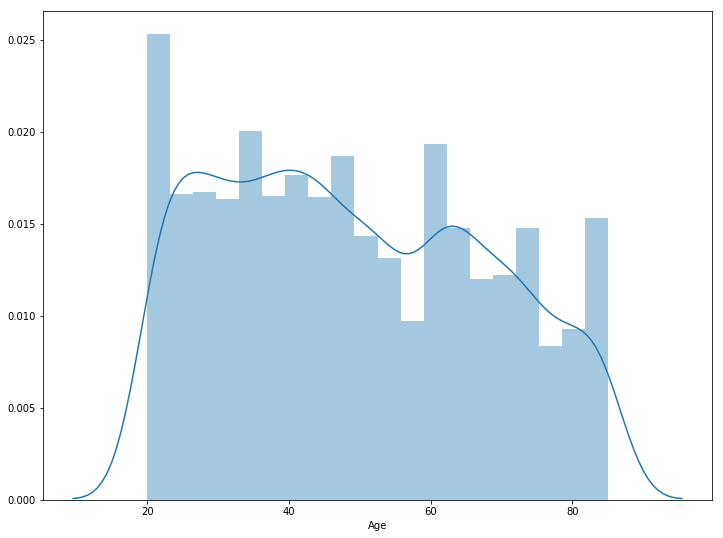

In [21]:
# Plotting the distribution of the variable Age

plt.figure(figsize=(12,9))
sns.distplot(age_df['Age'])
plt.show()

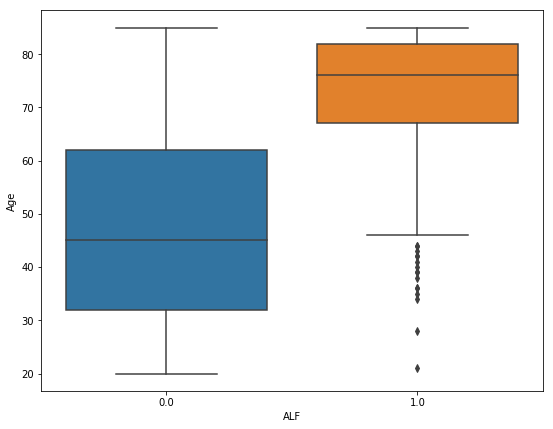

In [12]:
# Plotting the boxplots of the variable Age according to ALF

plt.figure(figsize=(9,7))
sns.boxplot(x='ALF', y='Age', data=age_df)
plt.show()

In [13]:
# Splitting ages for ALF positive and negative patients

age1 = age_df.loc[age_df['ALF']==1]
age0 = age_df.loc[age_df['ALF']==0]

In [14]:
# Comparing value of Age for ALF positive and negative patients with t-test for independent groups
# H0: ALF positive average Age = ALF negative average Age
# H1: ALF positive average Age != ALF negative average Age

from scipy.stats import ttest_ind

print('Test results: ', ttest_ind(age1['Age'], age0['Age'], equal_var=True))

# The p-value is lower than 0.05, so the mean of Age for ALF positive patients VS ALF negative is different.

Test results:  Ttest_indResult(statistic=30.61652690692112, pvalue=2.090516839436057e-191)


## Comparing Hepatitis between patients with ALF vs no ALF

In [15]:
# Reducing the dataframe to ALF, Hepatitis and another column that will be used to count patients after grouping them

hep_df = data[['ALF','Hepatitis', 'Gender']]
hep_df.head()

,ALF,Hepatitis,Gender
0,0.0,1.0,M
1,0.0,0.0,M
2,0.0,0.0,M
3,0.0,0.0,M
4,0.0,0.0,M


In [16]:
#Grouping patients according to ALF and Hepatitis and counting them

grouped = hep_df.groupby(['ALF', 'Hepatitis'], as_index=False).count()
grouped = grouped.rename(columns={'Gender':'Count'})
grouped

,ALF,Hepatitis,Count
0,0.0,0.0,5249
1,0.0,1.0,275
2,1.0,0.0,348
3,1.0,1.0,115


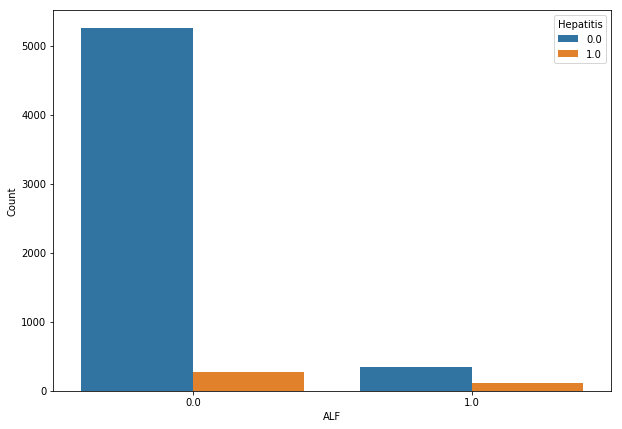

In [17]:
# Plotting the barplot of the variable Hepatitis according to ALF

plt.figure(figsize=(10,7))
sns.barplot(data=grouped, x='ALF', y='Count', hue='Hepatitis')
plt.show()

In [18]:
# As we have two dichotomous variables we will perform a Chi-square test
# Creating the contingency table

data_crosstab = pd.crosstab(data['Hepatitis'], 
                            data['ALF'], margins = False) 
data_crosstab

ALF,0.0,1.0
Hepatitis,,
0.0,5249,348
1.0,275,115


In [19]:
# Chi-square test
# H0: Percentage of patients with Hepatitis with ALF = Percentage of patients with Hepatitis without ALF
# H1: Percentage of patients with Hepatitis with ALF != Percentage of patients with Hepatitis without ALF

from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(data_crosstab, correction=False)
print('p-value= ', p)

# P-value is lower than 0.05, patients with Hepatitis are differently distributed in patients with ALF vs no ALF.

p-value=  3.981452561156449e-62


## Compare Maximum Blood Pressure between ALF vs no ALF

In [24]:
# Creating a dataframe with Max Blood Pressure and ALF columns only

mbp_df = data[['Maximum Blood Pressure', 'ALF']]
mbp_df.head()

,Maximum Blood Pressure,ALF
0,135.0,0.0
1,96.0,0.0
2,115.0,0.0
3,110.0,0.0
4,132.0,0.0


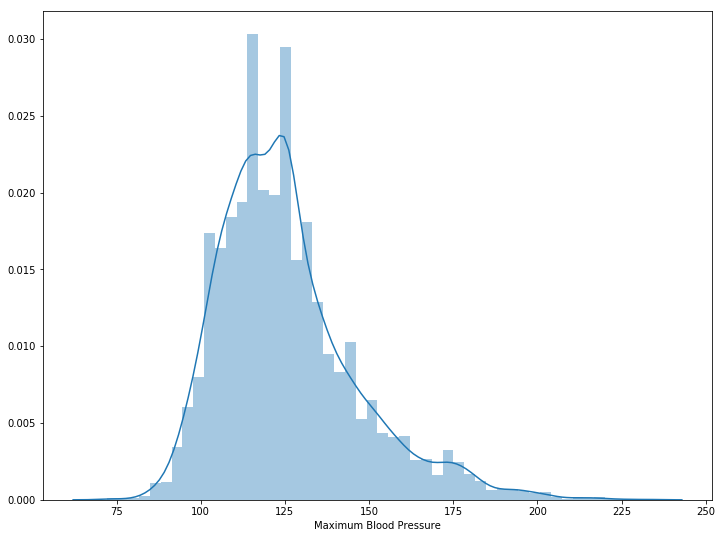

In [26]:
# Plotting the distribution of the variable Max Blood Pressure

plt.figure(figsize=(12,9))
sns.distplot(mbp_df['Maximum Blood Pressure'])
plt.show()

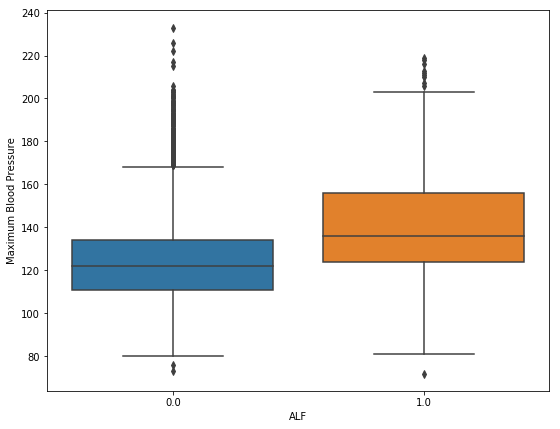

In [28]:
# Plotting the boxplots of the variable Max Blood Pressure according to ALF

plt.figure(figsize=(9,7))
sns.boxplot(x='ALF', y='Maximum Blood Pressure', data=mbp_df)
plt.show()

In [29]:
# Splitting ages for ALF positive and negative patients

mbp1 = mbp_df.loc[mbp_df['ALF']==1]
mbp0 = mbp_df.loc[mbp_df['ALF']==0]

In [31]:
# Comparing value of Max Blood Pressure for ALF positive and negative patients with t-test for independent groups
# H0: ALF positive average Max Blood Pressure = ALF negative average Max Blood Pressure
# H1: ALF positive average Max Blood Pressure != ALF negative average Max Blood Pressure

from scipy.stats import ttest_ind

print('Test results: ', ttest_ind(mbp1['Maximum Blood Pressure'], mbp0['Maximum Blood Pressure'], equal_var=True))

# The p-value is lower than 0.05, so the mean of Maximum Blood Pressure for ALF positive patients VS ALF negative is different.

Test results:  Ttest_indResult(statistic=16.76465404130982, pvalue=1.1031529753049593e-61)


## Principal Components Analysis to predict ALF

In [32]:
from sklearn.decomposition import PCA

numericData = data[['Age','Weight', 'Height', 'Body Mass Index',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol']] 

pca = PCA(n_components=4) 
principalComponents = pca.fit_transform(np.array(numericData))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])


principalDf.head() 

,PC 1,PC 2,PC 3,PC 4
0,133.310893,-28.332753,11.428032,-19.821501
1,-43.486090,-21.090571,-28.252987,-32.293440
2,78.176680,7.115570,-7.550188,-4.203267
3,18.218950,-34.696058,-2.558228,15.715654
4,13.661401,-14.272958,18.187531,10.611167


In [33]:
#Calculating percentage of variance explained by the 4 components

sum(pca.explained_variance_ratio_)

0.9224709557952528

## Logistic Regression and testing new people to predict ALF

In [34]:
from sklearn.linear_model import LogisticRegression

numericData = data[['Age','Weight', 'Height', 'Body Mass Index',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol']] 


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target = data['ALF'] 
model = LogisticRegression()
classification = model.fit(numericData, target)

classification.get_params()

C:\Users\marcm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
# Creating a new dataframe with hypothetical patients

table = [[38, 70,171,23.9,80.2,135,79,54,112,166], [82, 112,180,34.6,120,110,72,28,222,250],[60,81,162,30.9,118,141,90,51,183,234], [90,65,163,24.5, 78.7, 108,68,31,216,247]]
headers = numericData.columns
new_people =  pd.DataFrame(table, columns=headers)  
new_people

,Age,Weight,Height,Body Mass Index,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol
0,38,70,171,23.9,80.2,135,79,54,112,166
1,82,112,180,34.6,120.0,110,72,28,222,250
2,60,81,162,30.9,118.0,141,90,51,183,234
3,90,65,163,24.5,78.7,108,68,31,216,247


In [37]:
# Predicting ALF in new patients according to our logistic regression model

print('New patient 1: ', classification.predict(new_people)[0])
print('New patient 2: ', classification.predict(new_people)[1])
print('New patient 3: ', classification.predict(new_people)[2])
print('New patient 4: ', classification.predict(new_people)[3])

New patient 1:  0.0
New patient 2:  1.0
New patient 3:  0.0
New patient 4:  1.0


In [ ]:
# Patients 2 and 4 are predicted to have ALF